<a href="https://colab.research.google.com/github/ajrianop/ML/blob/main/04_DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Decision trees**

This notebook was created as udemy course notes of Machine Learning: "Machine Learning, Data Science and Deep Learning with Python" created by Frank Kane

## **Entropy**

Entropy is a fundamental concept in thermodynamics that measures the disorder or randomness of a physical system. In the realm of data science, entropy can also be used to measure the disorder or randomness of a data set. The entropy of a data set is zero when the data is completely ordered and consistent, and increases as the data becomes more random and varied. As a data scientist, understanding the entropy of a data set can provide valuable insights into its structure and allow for more accurate analysis and predictions. It is also important to note that entropy can also be used in information theory, as a measure of uncertainty in a random variable.

**How to compute entropy?**
$$H=-p_1\ln p_1-p_2\ln p_2-\cdots -p_n\ln p_n,$$
where $p_i=P(i)$ represent the proportion of the data (is equivalent to the probability of each class or outcome i in the data set).

As an example, if we have two event $A$, $B$ and $C$ class $A$ has $30\%$ of the data and the class $B$ has $20\%$ and class $C$ has $50\%$ of the data. So the entropy of this data set is given by:
$$Entropy=-0.3 \ln(0.3)-0.2 \ln(0.2)-0.5 \ln(0.5)= 0,6830.$$

## **Decision Tree**

Decision tree gives us a flowchart which help us to make some decision according to a classification description.
Some examples to use decision tree can be related to weather, where we can describe if the day will be rainy or sunny. There are other examples as:
1. medical diagnosis, which by means symptoms and test results, which we can lead to a diagnosis.
2. Quality control, which allows us identify causes or defects in any manufacturing process
3. Filter resumes by analyzing the historical hiring data and classify them based on a pre-established database that contains relevant attributes for the job position.

**How the algorithm works?**

The algorithm operates by identifying relevant attributes and partitioning the data set in a way that reduces the entropy of the input data, repeating this process for each attribute at various levels.

**Problems:**

The algorithm is very prompt to overfitting, so to avoid this problem there exists a technique call random forest, which works as a collection of trees, where each tree is trained on a random subset of the data. In order to conclude, the final output will be the average of each of our output results of all the decision trees.

### **Example**

Let us considered a data set with the hiring history in a tiny company.

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd

In [3]:
input_file = '/content/gdrive/MyDrive/Programming Topics/ML Python/PastHires04/PastHires.csv'
df = pd.read_csv(input_file)
df

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N
5,0,N,0,PhD,Y,Y,Y
6,5,Y,2,MS,N,Y,Y
7,3,N,1,BS,N,Y,Y
8,15,Y,5,BS,N,N,Y
9,0,N,0,BS,N,N,N


In [4]:
df.columns

Index(['Years Experience', 'Employed?', 'Previous employers',
       'Level of Education', 'Top-tier school', 'Interned', 'Hired'],
      dtype='object')

In order to train a model, will be necessary to change those categorical values to numbers. Thus, we are going to consider the following dictionaries:<br>
1. Those columns with values Y or N, we are going to consider
{'Y': 1 , 'N' : 0 }
2. The column with levels of education is a categorical column, with values BS  'bachelor studies',  MS 'Master studies' and PhD 'Doctoral studies'. So we consider
{'BS' : 0, 'MS' : 1, 'PhD' : 2}

To change the data in each associated columns we are going to use the funtion .map() in each columns.


In [5]:
df1= df.copy()
#Dictionaries to change values in categorical columns
dict_YN = {'Y': 1 , 'N' : 0 }
dict_edu = {'BS' : 0, 'MS' : 1, 'PhD' : 2}

#Using .map() to change values in each column
#Y, N values
YN_columns = ['Employed?', 'Top-tier school', 'Interned', 'Hired']
for column in YN_columns:
  df1[column ] = df1[column].map(dict_YN)
#
df1['Level of Education'] = df1['Level of Education'].map(dict_edu)
df1

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0
5,0,0,0,2,1,1,1
6,5,1,2,1,0,1,1
7,3,0,1,0,0,1,1
8,15,1,5,0,0,0,1
9,0,0,0,0,0,0,0


### **Decision Tree**

To built the decision tree we have to call the library sklearn

In [6]:
from sklearn import tree

#To call all the features in columns of df1 and exclude the target
features = list(df1.columns[:-1])

# To built decision tree we have to consider the independant variables and the dependant variable
X = df1[features]
y = df1['Hired']

# Creating the decision tree classifier
model = tree.DecisionTreeClassifier()

# Train the decision tree model
model = model.fit(X,y)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree model
clf.fit(X_train, y_train)

# Predict the churn labels for the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 0.25
Precision: 0.5
Recall: 0.3333333333333333
F1-score: 0.4
Confusion Matrix:
[[0 1]
 [2 1]]


In order to see how well the model fits the data, we can see the confusion matrix to describes the different measures, so given:

<table>
  <tr>
    <td>TN</td>
    <td>FP</td>
  </tr>
  <tr>
    <td>FN</td>
    <td>TP</td>
  </tr>
</table>

where:

TN: True negatives (correctly predicted negatives)
FP: False positives (incorrectly predicted positives)
FN: False negatives (incorrectly predicted negatives)
TP: True positives (correctly predicted positives)


* Accuracy measures the overall correctness of the model's predictions. This is computed dividing the number of correct predictions by the total number of predictions, in the previous example we have that the correct number of predictions is 1 and the total number of predictions is 4, so accuracy is 1/4 = 0.25.

$$\mathrm{accuracy} = \frac{TN + TP}{TN + FP + FN +TP}.$$

* Precision is the ratio of correctly predicted positive instances (TP) to the total instances predicted as positive (sum of TP and FP). Precision measures the quality of positive predictions.

$$\mathrm{precision} = \frac{TP}{FP +TP}.$$


*  Recall is the ratio of correctly predicted positive instances (TP) to the total actual positive instances (sum of TP and FN). Recall measures the ability of the model to capture positive instances.

$$\mathrm{recall} = \frac{TP}{TP + FN}.$$


*  F1-score is the harmonic mean of precision and recall and can be calculated using the formula: 2 * (Precision * Recall) / (Precision + Recall). It provides a balanced measure of precision and recall, taking into account both metrics.

$$\mathrm{F1} =  \frac{2 * \mathrm{precision} *  \mathrm{recall}}{\mathrm{precision} +  \mathrm{recall}}.$$


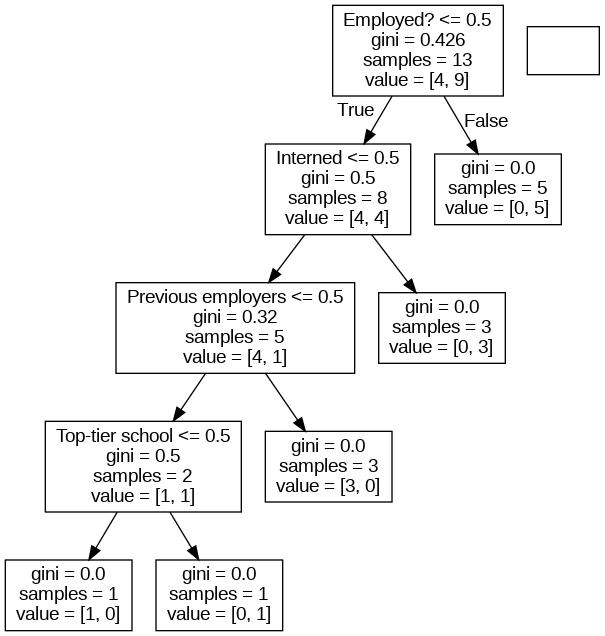

In [8]:
#!pip install six
#!pip install pydotplus

from IPython.display import Image
from six import StringIO
import pydotplus

# Allows us to create an in-memory file-like object that behaves like a traditional file object
dot_data = StringIO()

# Export the decision tree as a DOT file
# The information of the decision tree is saved in dot_data
tree.export_graphviz(model, out_file=dot_data,
                         feature_names=features)

# Parse the DOT data and create a graph object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

In [9]:
dot_data.getvalue()

'digraph Tree {\nnode [shape=box, fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="Employed? <= 0.5\\ngini = 0.426\\nsamples = 13\\nvalue = [4, 9]"] ;\n1 [label="Interned <= 0.5\\ngini = 0.5\\nsamples = 8\\nvalue = [4, 4]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Previous employers <= 0.5\\ngini = 0.32\\nsamples = 5\\nvalue = [4, 1]"] ;\n1 -> 2 ;\n3 [label="Top-tier school <= 0.5\\ngini = 0.5\\nsamples = 2\\nvalue = [1, 1]"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 1\\nvalue = [1, 0]"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 1]"] ;\n3 -> 5 ;\n6 [label="gini = 0.0\\nsamples = 3\\nvalue = [3, 0]"] ;\n2 -> 6 ;\n7 [label="gini = 0.0\\nsamples = 3\\nvalue = [0, 3]"] ;\n1 -> 7 ;\n8 [label="gini = 0.0\\nsamples = 5\\nvalue = [0, 5]"] ;\n0 -> 8 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n}'

In [10]:
'''
#To see the information in the DOT data
dot_data.getvalue()

# Call the information in the nodes and edges
nodes = graph.get_nodes()
edges = graph.get_edges()

# Print node labels
for node in nodes:
    print(node.get_label())

# Print edge sources and destinations
for edge in edges:
    print(edge.get_source(), edge.get_destination())
'''

'\n#To see the information in the DOT data\ndot_data.getvalue()\n\n# Call the information in the nodes and edges\nnodes = graph.get_nodes()\nedges = graph.get_edges()\n\n# Print node labels\nfor node in nodes:\n    print(node.get_label())\n\n# Print edge sources and destinations\nfor edge in edges:\n    print(edge.get_source(), edge.get_destination())\n'

According to the graphic, we can see that the data is divided based on conditions across multiple features, resulting in two branches. If we examine the condition "interned" and find it to be less than or equal to 0.5, we notice that there are additional features to consider for true values. However, if the condition is false, we can conclude decisively that five people have been hired.

In the third step, it is important to note that if the years of experience are less than 0.5, false values lead to a remaining three people who, ultimately, are not hired. In conclusion, when generating a decision tree, we observe several numerical true/false questions that guide us in subdividing our dataset and describing subsets with specific properties.

### **Random Forest**

Random forest is a Machine Learning algorithm used to for regressions and classifications. This is a ensemble method which combines multiple decision trees to create a more robust and accurate model.

This algorithm takes several decision trees, which at final generates a forest of decision trees, this decision trees are trained independently and then all the predictions are combined to conclude. This method can help to identify the most important features in the dataset.

In [11]:
from sklearn.ensemble import RandomForestClassifier

# To built random forest with 10 trees
model2 = RandomForestClassifier(n_estimators=10)
model2 = model2.fit(X, y)

#Predict employment of an employed 10-year veteran
print (model2.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (model2.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [12]:
import random
print(random.randint(0,25))

1


## Exercise
Consider another dataframe and assess how well the previous model describes and fits the data.

In [13]:
import pandas as pd
import random

# Define the column names and options
columns = ['Years Experience', 'Employed?', 'Previous employers', 'Level of Education', 'Top-tier school', 'Interned', 'Hired']
yes_no_options = ['Y', 'N']
education_options = ['BS', 'MS', 'PhD']
top_tier_options = ['Y', 'N']

# Generate the dataset
data = []
for _ in range(100):
    years_exp = random.uniform(0, 20)
    employed = random.choice(yes_no_options)
    prev_employers = random.randint(0, 10)
    education = random.choice(education_options)
    top_tier_school = random.choice(top_tier_options)
    interned = random.choice(yes_no_options)

    # Determine hired status based on years of experience and other factors
    hired = 'Y' if years_exp > 2 and employed == 'Y' and prev_employers < 5 and education != 'High School' else 'N'

    data.append([years_exp, employed, prev_employers, education, top_tier_school, interned, hired])

# Create a DataFrame from the generated data
df_ex = pd.DataFrame(data, columns=columns)

# Display the dataset
df_ex['Years Experience'] = df_ex['Years Experience'].astype(int)
df_ex


,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,1,N,7,PhD,Y,Y,N
1,0,N,1,MS,N,N,N
2,13,Y,1,PhD,N,N,Y
3,19,Y,1,MS,N,N,Y
4,11,N,8,MS,Y,N,N
...,...,...,...,...,...,...,...
95,10,N,2,BS,Y,N,N
96,16,Y,5,PhD,N,Y,N
97,6,Y,4,PhD,Y,Y,Y
98,14,N,7,PhD,Y,Y,N


To train the random forest, we need to convert each categorical variable into numerical form.

In [14]:
df2 = df_ex.copy()

#Dictionaries to change values in categorical columns
dict_YN = {'Y': 1 , 'N' : 0 }
dict_edu = {'BS' : 0, 'MS' : 1, 'PhD' : 2}

#Using .map() to change values in each column
#Y, N values
YN_columns = ['Employed?', 'Top-tier school', 'Interned', 'Hired']
for column in YN_columns:
  df2[column ] = df2[column].map(dict_YN)
#
df2['Level of Education'] = df2['Level of Education'].map(dict_edu)
df2

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,1,0,7,2,1,1,0
1,0,0,1,1,0,0,0
2,13,1,1,2,0,0,1
3,19,1,1,1,0,0,1
4,11,0,8,1,1,0,0
...,...,...,...,...,...,...,...
95,10,0,2,0,1,0,0
96,16,1,5,2,0,1,0
97,6,1,4,2,1,1,1
98,14,0,7,2,1,1,0


Therefore, let us describe the code step by step to determine if our model fits well. We will analyze several scores and provide an explanation for each one.

In [15]:
# Split the data into features (X) and target variable (y)
X = df2.drop('Hired', axis=1)
y = df2['Hired']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree model
clf.fit(X_train, y_train)

# Predict the churn labels for the test set
y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the evaluation metrics and confusion matrix
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-score: {f1}')
print('Confusion Matrix:')
print(conf_matrix)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0
Confusion Matrix:
[[26  0]
 [ 0  4]]


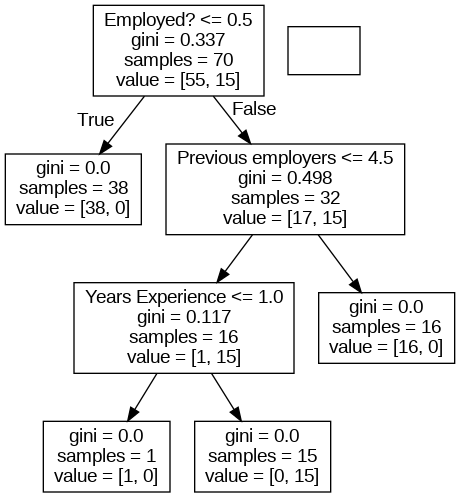

In [16]:
from IPython.display import Image
from six import StringIO
import pydotplus

# Allows us to create an in-memory file-like object that behaves like a traditional file object
dot_data = StringIO()

# Export the decision tree as a DOT file
# The information of the decision tree is saved in dot_data
tree.export_graphviz(clf, out_file=dot_data,
                         feature_names=features)

# Parse the DOT data and create a graph object
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

Image(graph.create_png())

## Dictionary

**gini:** this is the gini score which describes the measure of entropy. The Gini impurity is calculated for a specific node in the decision tree and measures the probability of misclassifying a randomly selected sample from that node. A lower Gini impurity indicates a more pure or homogeneous node, while a higher Gini impurity suggests a more mixed or heterogeneous node.
